In [1]:
import numpy as np
import pandas as pd

In [2]:
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [4]:
df['X1'] = [1,2,3,4,5,6,6,7,9,9]
df['X2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [6]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

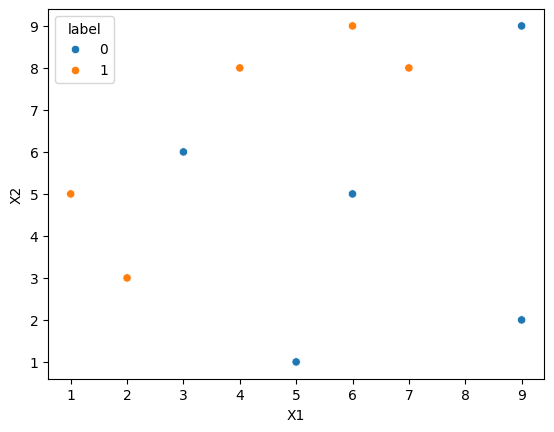

In [7]:
sns.scatterplot(x=df['X1'], y =df['X2'], hue = df['label'])

In [8]:
df['weights'] = 1/df.shape[0]

In [9]:
df

,X1,X2,label,weights
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt1 = DecisionTreeClassifier(max_depth=1)

In [12]:
X = df.iloc[:,0:2].values
y = df.iloc[:,2].values

In [13]:
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

In [14]:
from sklearn.tree import plot_tree

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.625, 0.5, '  False')]

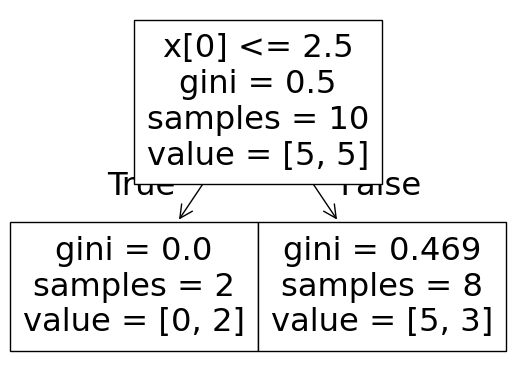

In [15]:
plot_tree(dt1)

<Axes: >

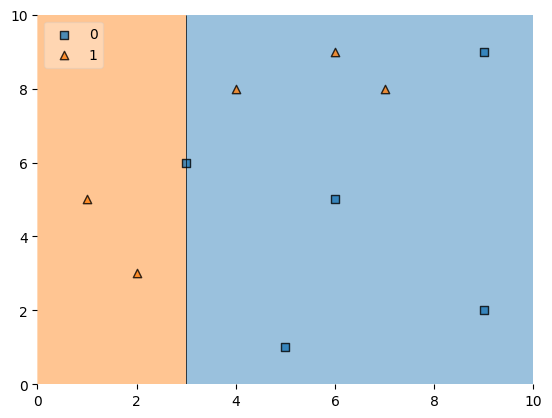

In [16]:
plot_decision_regions(X,y, clf=dt1, legend=2)

In [17]:
df['y_pred'] = dt1.predict(X)

In [18]:
df

,X1,X2,label,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [65]:
def calculate_model_weight(error):
  return 0.5 * np.log((1 - error) / (error+0.0000001))

In [20]:
#Calculating first model weight
alpha1 = calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [21]:
def update_row_weights(row,alpha=0.423):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [22]:
df['updated_weights'] = df.apply(update_row_weights, axis=1)

In [23]:
df

,X1,X2,label,weights,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [24]:
df['updated_weights'].sum()

0.9165153319682015

In [25]:
df['normalized_weights'] = df['updated_weights'] / df['updated_weights'].sum()

In [26]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [27]:
df['normalized_weights'].sum()

1.0

In [28]:
df['cummsum_upper'] = np.cumsum(df['normalized_weights']) #upper-range

In [29]:
df['cummsum_lower'] = df['cummsum_upper'] - df['normalized_weights'] #lower-range

In [30]:
df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cummsum_upper,cummsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,0,0.065508,0.071475,0.214425,0.142950
3,4,8,1,0.1,0,0.152653,0.166559,0.380983,0.214425
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,0,0.152653,0.166559,0.619017,0.452458
6,6,5,0,0.1,0,0.065508,0.071475,0.690492,0.619017
7,7,8,1,0.1,0,0.152653,0.166559,0.857050,0.690492
8,9,9,0,0.1,0,0.065508,0.071475,0.928525,0.857050
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [31]:
def create_new_dataset(df):
  indices = []
  for i in range(df.shape[0]):
    a = np.random.random()
    for index, row in df.iterrows():
      if row['cummsum_upper'] > a and a > row['cummsum_lower']:
        indices.append(index)
  return indices

In [32]:
index_values = create_new_dataset(df)

In [33]:
index_values

[7, 4, 9, 3, 7, 3, 2, 1, 2, 4]

In [34]:
second_df = df.iloc[index_values,[0,1,2,3]]

In [35]:
second_df

,X1,X2,label,weights
7,7,8,1,0.1
4,5,1,0,0.1
9,9,2,0,0.1
3,4,8,1,0.1
7,7,8,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
1,2,3,1,0.1
2,3,6,0,0.1
4,5,1,0,0.1


In [36]:
dt2 = DecisionTreeClassifier(max_depth=1)

In [37]:
X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

In [38]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.625, 0.5, '  False')]

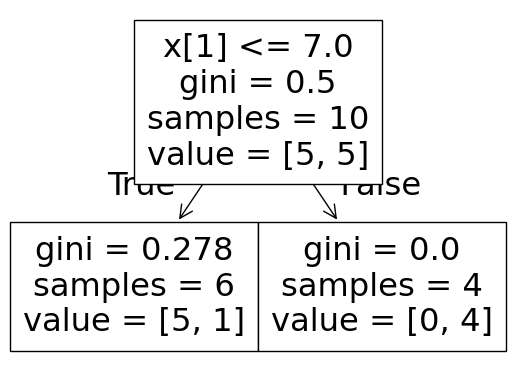

In [39]:
plot_tree(dt2)

<Axes: >

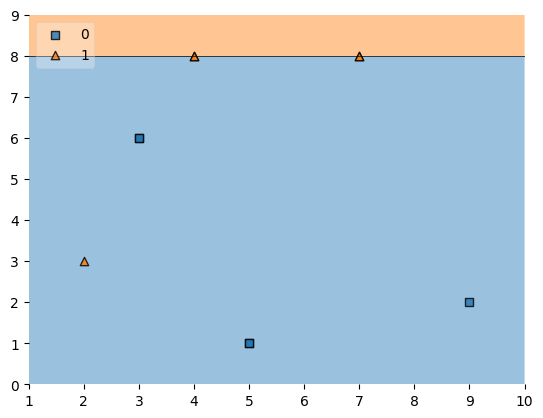

In [40]:
plot_decision_regions(X,y, clf=dt2, legend=2)

In [41]:
second_df['y_pred'] = dt2.predict(X)

In [42]:
second_df

,X1,X2,label,weights,y_pred
7,7,8,1,0.1,1
4,5,1,0,0.1,0
9,9,2,0,0.1,0
3,4,8,1,0.1,1
7,7,8,1,0.1,1
3,4,8,1,0.1,1
2,3,6,0,0.1,0
1,2,3,1,0.1,0
2,3,6,0,0.1,0
4,5,1,0,0.1,0


In [43]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [44]:
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weights'] * np.exp(-alpha)
  else:
    return row['weights'] * np.exp(alpha)

In [45]:
second_df['updated_weights'] = second_df.apply(update_row_weights, axis=1)

In [46]:
second_df

,X1,X2,label,weights,y_pred,updated_weights
7,7,8,1,0.1,1,0.033622
4,5,1,0,0.1,0,0.033622
9,9,2,0,0.1,0,0.033622
3,4,8,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
2,3,6,0,0.1,0,0.033622
1,2,3,1,0.1,0,0.297427
2,3,6,0,0.1,0,0.033622
4,5,1,0,0.1,0,0.033622


In [47]:
second_df['normalized_weights'] = second_df['updated_weights'] / second_df['updated_weights'].sum()

In [48]:
second_df['cummsum_upper'] = np.cumsum(second_df['normalized_weights']) #upper-range

In [49]:
second_df['cummsum_lower'] = second_df['cummsum_upper'] - second_df['normalized_weights'] #lower-range

In [50]:
second_df

,X1,X2,label,weights,y_pred,updated_weights,normalized_weights,cummsum_upper,cummsum_lower
7,7,8,1,0.1,1,0.033622,0.056034,0.056034,0.000000
4,5,1,0,0.1,0,0.033622,0.056034,0.112068,0.056034
9,9,2,0,0.1,0,0.033622,0.056034,0.168102,0.112068
3,4,8,1,0.1,1,0.033622,0.056034,0.224136,0.168102
7,7,8,1,0.1,1,0.033622,0.056034,0.280170,0.224136
3,4,8,1,0.1,1,0.033622,0.056034,0.336204,0.280170
2,3,6,0,0.1,0,0.033622,0.056034,0.392238,0.336204
1,2,3,1,0.1,0,0.297427,0.495694,0.887932,0.392238
2,3,6,0,0.1,0,0.033622,0.056034,0.943966,0.887932
4,5,1,0,0.1,0,0.033622,0.056034,1.000000,0.943966


In [51]:
index_values = create_new_dataset(second_df)

In [53]:
third_df = second_df.iloc[index_values,[0,1,2,3]]

In [55]:
third_df

,X1,X2,label,weights
1,2,3,1,0.1
4,5,1,0,0.1
3,4,8,1,0.1
1,2,3,1,0.1
4,5,1,0,0.1
7,7,8,1,0.1
4,5,1,0,0.1
4,5,1,0,0.1
4,5,1,0,0.1
3,4,8,1,0.1


In [56]:
dt3 = DecisionTreeClassifier(max_depth=1)

In [57]:
X = third_df.iloc[:,0:2].values
y = third_df.iloc[:,2].values

In [58]:
dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.0\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

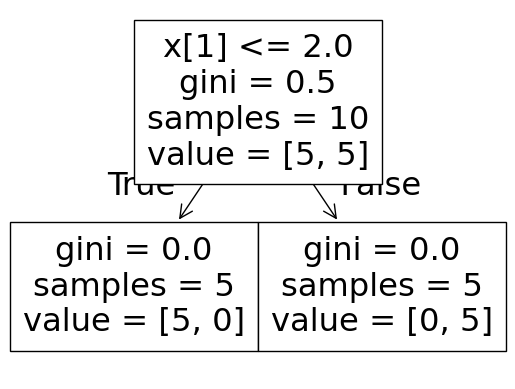

In [59]:
plot_tree(dt3)

<Axes: >

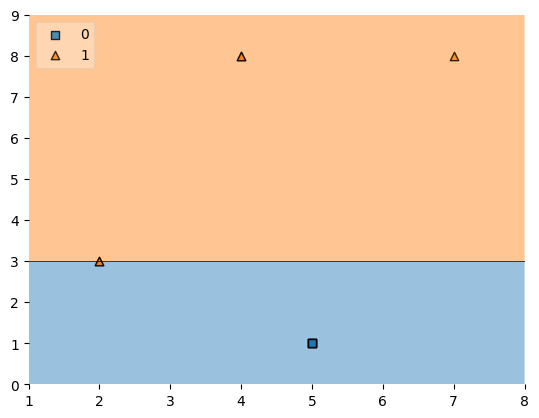

In [60]:
plot_decision_regions(X,y, clf = dt3, legend = 2)

In [62]:
third_df['y_pred'] = dt3.predict(X)

In [63]:
third_df #No error

,X1,X2,label,weights,y_pred
1,2,3,1,0.1,1
4,5,1,0,0.1,0
3,4,8,1,0.1,1
1,2,3,1,0.1,1
4,5,1,0,0.1,0
7,7,8,1,0.1,1
4,5,1,0,0.1,0
4,5,1,0,0.1,0
4,5,1,0,0.1,0
3,4,8,1,0.1,1


In [66]:
alpha3 = calculate_model_weight(0)
alpha3

8.05904782547916

In [67]:
print(alpha1, alpha2, alpha3)

0.42364893019360184 1.0986122886681098 8.05904782547916


**Prediction**

In [68]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1])

In [69]:
dt2.predict(query)

array([0])

In [70]:
dt3.predict(query)

array([1])

In [71]:
alpha1*1 + alpha2*0 + alpha3*1

8.482696755672762

In [72]:
np.sign(8.48) #Correct prediction for 1,5

1.0